In [15]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import metrics
import math
from statistics import median
import seaborn as sns
import re
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [16]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [17]:
dffilm.drop(['id','belongs_to_collection','budget','genres','homepage',
            'imdb_id','original_language','original_title','overview','poster_path','production_companies',
            'production_countries','release_date','runtime','spoken_languages',
            'status','tagline','title','Keywords','cast','crew'], axis=1, inplace=True)

dffilm =dffilm[dffilm['revenue'] !=0]
dffilm = dffilm[dffilm['revenue'] >100]
dffilm.head()

,popularity,revenue
0,3.800073,10703234
1,0.402368,234748
2,1.926826,850259
3,5.010563,12935800
4,1.623440,39598448


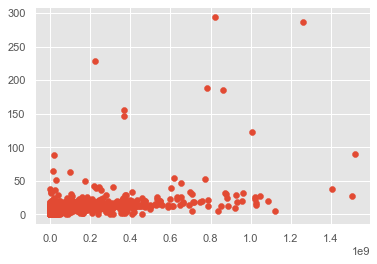

In [18]:
plt.scatter(dffilm.revenue, dffilm.popularity)

In [19]:
X = dffilm.popularity.values.reshape(-1, 1)
X[:5]

array([[3.800073],
       [0.402368],
       [1.926826],
       [5.010563],
       [1.62344 ]])

In [20]:




X.shape

(2959, 1)

In [21]:
y=dffilm.revenue

In [22]:
# Create a model with scikit-learn
model = LinearRegression()
model

LinearRegression()

In [23]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [24]:
# The slope
print(model.coef_)

[5228901.44999234]


In [25]:
# The y-intercept
print(model.intercept_)

22994823.926041193


In [26]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
#print(predicted_y_values)
print(X)

[[3.800073e+00]
 [4.023680e-01]
 [1.926826e+00]
 ...
 [4.558075e+00]
 [2.922960e-01]
 [2.229000e-03]]


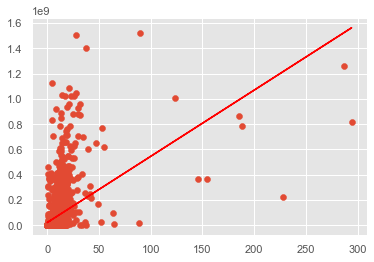

In [27]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X,predicted_y_values,color='red')

/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


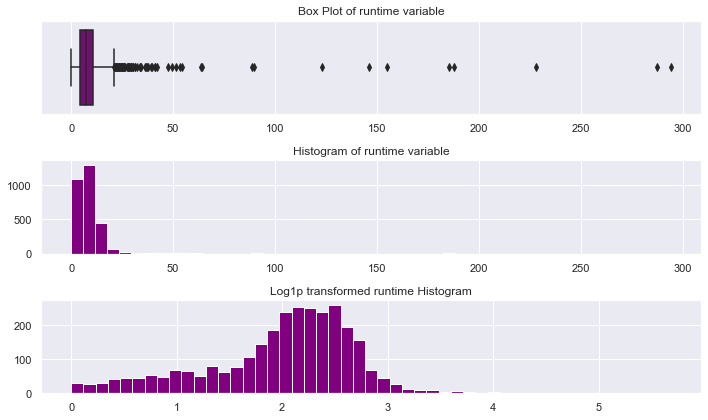

In [29]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=X, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=X, kde = False, ax = ax[1], color='purple', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime variable")
sns.distplot(a=np.log1p(X), kde = False, ax = ax[2], color='purple', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed runtime Histogram")
f.tight_layout()

In [30]:
dffilm['popularity'].describe()

count    2959.000000
mean        8.540146
std        12.163615
min         0.000001
25%         4.164896
50%         7.429080
75%        10.934807
max       294.337037
Name: popularity, dtype: float64